In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-50, 50.1, 0.1)
y = 1 / 2 * x + 1
x = x.reshape((1001, 1))
print(x.shape)
print(x)
y = y.reshape((1001, 1))
print(y.shape)
print(y)

(1001, 1)
[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]
(1001, 1)
[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]


In [2]:
z = np.concatenate((x, y), axis = 1)
print(z.shape)
print(z)

(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


In [3]:
d = np.array((y[1:] - y[:-1]) / (x[1:] - x[:-1]))
d = d.reshape((1000, 1))
print(d.shape)
print(d)

(1000, 1)
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0

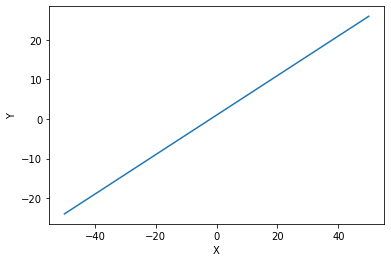

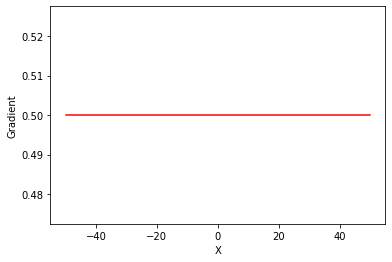

<Figure size 432x288 with 0 Axes>

In [4]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y)
plt.show()
plt.clf()

plt.xlabel('X')
plt.ylabel('Gradient')
plt.plot(x[1:], d, color = 'red')
plt.show()
plt.clf()

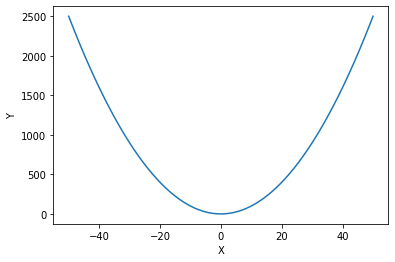

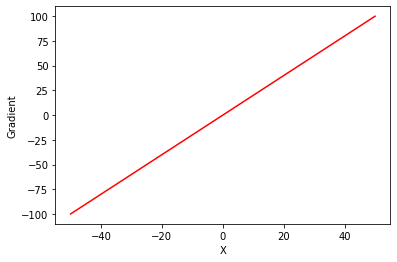

XY shape: (1001, 2)
Gradient shape: (1000,)


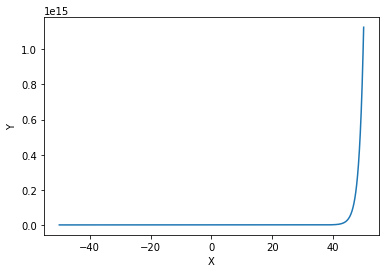

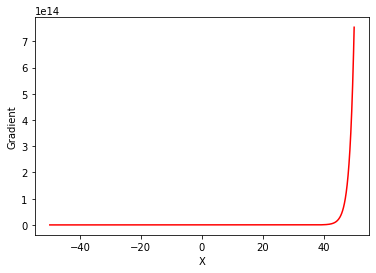

XY shape: (1001, 2)
Gradient shape: (1000,)


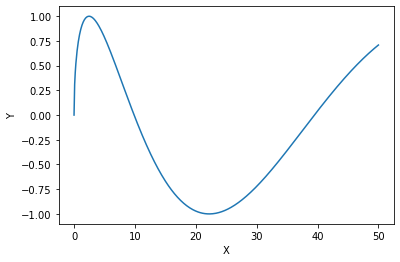

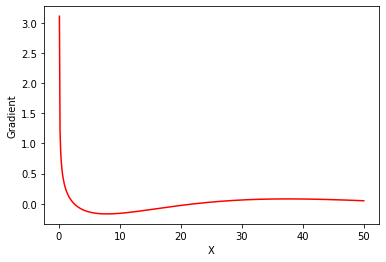

XY shape: (501, 2)
Gradient shape: (500,)


<Figure size 432x288 with 0 Axes>

In [5]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    x = np.arange(x_range[0], x_range[1], x_range[2])
    y = function(x)
    array_xy = np.hstack((x.reshape((len(x), 1)), y.reshape(len(y), 1)))
    gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x, y)
    plt.show()
    plt.clf()

    plt.xlabel('X')
    plt.ylabel('Gradient')
    plt.plot(x[1:], gradient, color = 'red')
    plt.show()
    plt.clf()
    
    print("XY shape:", array_xy.shape)
    print("Gradient shape:", gradient.shape)
    print("===============================")
    
    return array_xy, gradient

def function1(array_x):
    array_y = np.power(array_x, 2)
    return array_y

def function2(array_x):
    array_y = 2 * np.power(array_x, 2) + np.power(2, array_x)
    return array_y

def function3(array_x):
    array_y = np.sin(np.power(array_x, 1 / 2))
    return array_y

a,b = compute_gradient(function1)
a,b = compute_gradient(function2)
a,b = compute_gradient(function3, (0, 50.1, 0.1))

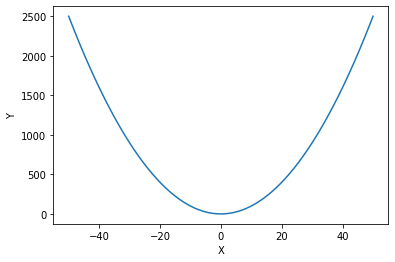

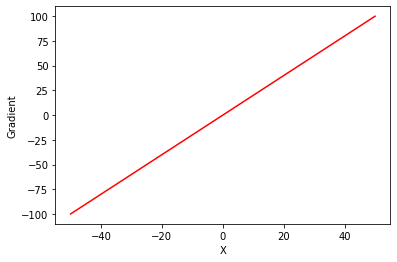

XY shape: (1001, 2)
Gradient shape: (1000,)
Slope before taking the minimum: -0.09999999999858034
Slope before taking the minimum: 0.30000000000142535
Min value: 5.048709793414476e-25
Min index: 500


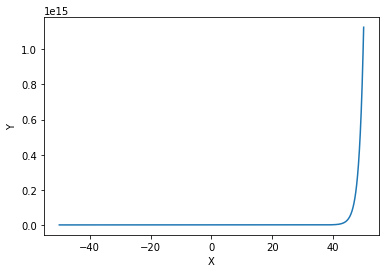

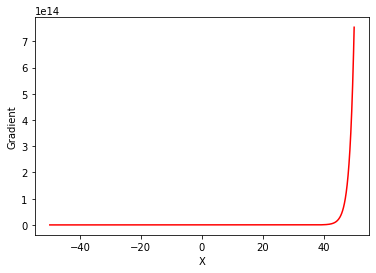

XY shape: (1001, 2)
Gradient shape: (1000,)
Slope before taking the minimum: -0.4170183305979998
Slope before taking the minimum: 0.4696700846350943
Min value: 0.9505505632959851
Min index: 498


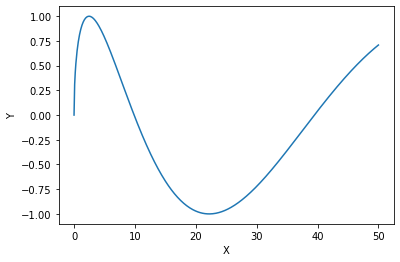

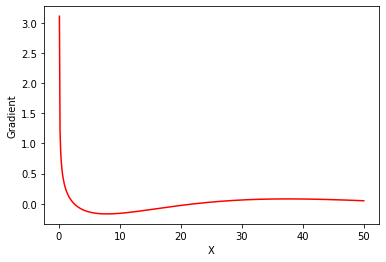

XY shape: (501, 2)
Gradient shape: (500,)
Slope before taking the minimum: -0.0006388422559544435
Slope before taking the minimum: 0.0016061158921243152
Min value: -0.9999997540298113
Min index: 222


<Figure size 432x288 with 0 Axes>

In [6]:
xy1, gradient1 = compute_gradient(function1)
min_y1 = np.min(xy1.T[1])
min_index_y1 = np.argmin(xy1.T[1])
print("Slope before taking the minimum:", gradient1[min_index_y1 - 1])
print("Slope before taking the minimum:", gradient1[min_index_y1 + 1])
print("Min value:", min_y1)
print("Min index:", min_index_y1)

xy1, gradient1 = compute_gradient(function2)
min_y1 = np.min(xy1.T[1])
min_index_y1 = np.argmin(xy1.T[1])
print("Slope before taking the minimum:", gradient1[min_index_y1 - 1])
print("Slope before taking the minimum:", gradient1[min_index_y1 + 1])
print("Min value:", min_y1)
print("Min index:", min_index_y1)

xy1, gradient1 = compute_gradient(function3, (0, 50.1, 0.1))
min_y1 = np.min(xy1.T[1])
min_index_y1 = np.argmin(xy1.T[1])
print("Slope before taking the minimum:", gradient1[min_index_y1 - 1])
print("Slope before taking the minimum:", gradient1[min_index_y1 + 1])
print("Min value:", min_y1)
print("Min index:", min_index_y1)